# 1

In [56]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [57]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

In [58]:
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Illustration of discrete time points for h=0.5')

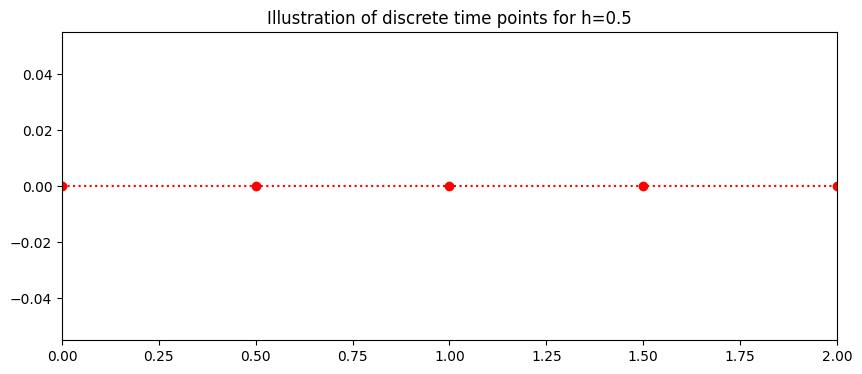

In [59]:
def func(x,y):
    dydx = -x*y
    return dydx


# Start and end of interval
b=2
a=0
# Step size
N=4
h=0.5
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))

In [60]:
IC=y0 # Intial condtion


In [61]:
### Initial conditions
w=np.zeros(len(t))
w[0]=IC
w[1]=y[1] # NEED FOR THE METHOD
for k in range (1,N):
    w[k+1]=w[k]+h/2.0*(3*func(t[k], w[k])-func(t[k-1],w[k-1]))  
def plotting(t,w,y):
    fig = plt.figure(figsize=(10,4))
    #plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w,'s:',color='blue',label='Adams-Bashforth')
    plt.xlabel('time')
    plt.legend()
    plt.show

plotting(t,w,y)

IndexError: invalid index to scalar variable.

In [ ]:

#dy_dx = -x*y
def dy_dx(x,y):
    dydx = -x*y
    return dydx
x_init = 0
y_init = 1
step_size = 0.5
def adams_bashforth_4th_order(dy_dx, x_init, y_init, x_final, step_size):
    num_steps = int((x_final - x_init) / step_size) + 1
    x_values = np.linspace(x_init, x_final, num_steps)
    y_values = np.zeros(num_steps)
    y_values[0] = y_init

    for i in range(1, 4):
        k1 = step_size * dy_dx(x_values[i - 1], y_values[i - 1])
        k2 = step_size * dy_dx(x_values[i - 1] + step_size / 2, y_values[i - 1] + k1 / 2)
        k3 = step_size * dy_dx(x_values[i - 1] + step_size / 2, y_values[i - 1] + k2 / 2)
        k4 = step_size * dy_dx(x_values[i - 1] + step_size, y_values[i - 1] + k3)

        y_values[i] = y_values[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    for i in range(4, num_steps):
        y_values[i] = y_values[i - 1] + (step_size / 24) * (
            55 * dy_dx(x_values[i - 1], y_values[i - 1])
            - 59 * dy_dx(x_values[i - 2], y_values[i - 2])
            + 37 * dy_dx(x_values[i - 3], y_values[i - 3])
            - 9 * dy_dx(x_values[i - 4], y_values[i - 4])
        )

    return x_values, y_values

adams_bashforth_4th_order(dy_dx, x_init, y_init, 2, step_size)


(array([0. , 0.5, 1. , 1.5, 2. ]),
 array([1.        , 0.88248698, 0.60649435, 0.32491474, 0.17182498]))

In [101]:
import numpy as np
def dy_dx(x,y):
    return (x+y-1)
    # return -x*y
x_init = 0
y_init = 1
step_size = 1
def adams_bashforth_moulton(dy_dx, x_init, y_init, x_final, step_size):
    num_steps = int((x_final - x_init) / step_size) + 1
    x_values = np.linspace(x_init, x_final, num_steps)
    y_values = np.zeros(num_steps)
    y_values[0] = y_init

    # Use Adams-Bashforth 4th order for the first 4 steps
    for i in range(1, 4):
        k1 = step_size * dy_dx(x_values[i - 1], y_values[i - 1])
        k2 = step_size * dy_dx(x_values[i - 1] + step_size / 2, y_values[i - 1] + k1 / 2)
        k3 = step_size * dy_dx(x_values[i - 1] + step_size / 2, y_values[i - 1] + k2 / 2)
        k4 = step_size * dy_dx(x_values[i - 1] + step_size, y_values[i - 1] + k3)

        y_values[i] = y_values[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        bash = y_values
    # Use Adams-Moulton 3rd order for the remaining steps
    for i in range(3, num_steps - 1):
        predictor = y_values[i] + (step_size / 24) * (
            55 * dy_dx(x_values[i], y_values[i])
            - 59 * dy_dx(x_values[i - 1], y_values[i - 1])
            + 37 * dy_dx(x_values[i - 2], y_values[i - 2])
            - 9 * dy_dx(x_values[i - 3], y_values[i - 3])
        )

        corrector = y_values[i] + (step_size / 24) * (
            9 * dy_dx(x_values[i + 1], predictor)
            + 19 * dy_dx(x_values[i], y_values[i])
            - 5 * dy_dx(x_values[i - 1], y_values[i - 1])
            + dy_dx(x_values[i - 2], y_values[i - 2])
        )

        y_values[i + 1] = corrector

    moultn = y_values
    return bash, moultn

adams_bashforth_moulton(dy_dx, x_init, y_init, 5, step_size)


(array([  1.        ,   1.70833333,   5.33506944,  16.86581308,
         49.36259894, 138.19029588]),
 array([  1.        ,   1.70833333,   5.33506944,  16.86581308,
         49.36259894, 138.19029588]))

In [104]:
import numpy as np
def dy_dx(x,y):
    return (x+y-1)

x_init = 0
y_init =1
x_final = 4
step_size = 0.2
def adams_bashforth_4th_order(dy_dx, x_init, y_init, x_final, step_size):
    num_steps = int((x_final - x_init) / step_size) + 1
    x_values = np.linspace(x_init, x_final, num_steps)
    y_values = np.zeros(num_steps)
    y_values[0] = y_init

    for i in range(1, 4):
        k1 = step_size * dy_dx(x_values[i - 1], y_values[i - 1])
        k2 = step_size * dy_dx(x_values[i - 1] + step_size / 2, y_values[i - 1] + k1 / 2)
        k3 = step_size * dy_dx(x_values[i - 1] + step_size / 2, y_values[i - 1] + k2 / 2)
        k4 = step_size * dy_dx(x_values[i - 1] + step_size, y_values[i - 1] + k3)

        y_values[i] = y_values[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6


    return x_values, y_values


In [105]:
adams_bashforth_4th_order(dy_dx, x_init, y_init, x_final, step_size)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 array([1.        , 1.0214    , 1.09181796, 1.22210646, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]))

In [113]:
import numpy as np
def dy_dx(x,y):
    return (x+y-1)

x_init = 0
y_init =1
x_final = 1
step_size = 0.2

def moulton(dy_dx, x_init, y_init, x_final, step_size):
    for i in range(0, num_steps):
        predictor = y_values[i] + (step_size / 24) * (
            55 * dy_dx(x_values[i], y_values[i])
            - 59 * dy_dx(x_values[i - 1], y_values[i - 1])
            + 37 * dy_dx(x_values[i - 2], y_values[i - 2])
            - 9 * dy_dx(x_values[i - 3], y_values[i - 3])
        )

        corrector = y_values[i] + (step_size / 24) * (
            9 * dy_dx(x_values[i + 1], predictor)
            + 19 * dy_dx(x_values[i], y_values[i])
            - 5 * dy_dx(x_values[i - 1], y_values[i - 1])
            + dy_dx(x_values[i - 2], y_values[i - 2])
        )

        y_values[i] = corrector
        return y_values

print(moulton(dy_dx, x_init, y_init, x_final, step_size))

def adams_bashforth_1st_order(dy_dx, x_init, y_init, x_final, step_size):
    num_steps = int((x_final - x_init) / step_size) + 1
    x_values = np.linspace(x_init, x_final, num_steps)
    y_values = np.zeros(num_steps+1)
    y_values[0] = y_init

    for i in range(1, num_steps):
        y_values[i] = y_values[i-1] + step_size * dy_dx(x_values[i-1], y_values[i-1])

    return x_values, y_values

#adams_bashforth_1st_order(dy_dx, x_init, y_init, x_final, step_size)


[-121.16828148536831, 9.7, 15.399999999999999, 24.107999999999997, 37.3184, 57.23984, 87.127488, 131.76688000000001, 198.17738752000002, 296.633600256, 442.14640117760007]


# 3

In [64]:
def euler_method(x0, y0, h, num_steps):
    # Initialize lists to store the results
    x_values = [x0]
    y_values = [y0]

    # Perform the Euler method iterations
    for i in range(num_steps):
        dx_dt = 2 * x_values[i] + 4 * y_values[i]
        dy_dt = -x_values[i] + 6 * y_values[i]

        x_next = x_values[i] + h * dx_dt
        y_next = y_values[i] + h * dy_dt

        # Append the next values to the lists
        x_values.append(x_next)
        y_values.append(y_next)

    return x_values, y_values

# Initial conditions
x0 = -1
y0 = 6

# Step size and number of steps
h = 0.1
num_steps = 10  # You can increase this value for a more accurate result

# Applying the Euler method
x_values, y_values = euler_method(x0, y0, h, num_steps)

# Printing the results
print(x_values)
print(y_values)


[-1, 1.2000000000000002, 5.32, 12.544, 24.695999999999998, 44.56256, 76.37100799999999, 126.49620479999999, 204.50219776, 324.67359232, 508.2617508864]
[6, 9.7, 15.399999999999999, 24.107999999999997, 37.3184, 57.23984, 87.127488, 131.76688000000001, 198.17738752000002, 296.633600256, 442.14640117760007]


In [66]:
def func(x):
    dydx = x**3 + x**2 + x + 1 
    return dydx

deltaX = 0.01
h = 0.01
num_steps=1
y0 = 1


def Euler(x0, y0, h, num_steps):
    x_values = [x0]
    y_values = [y0]
    for i in range(num_steps):
        dydx = func(x_values[i])
        y_next = y_values[i] + h * dydx
        x_next = x_values[i] + h
        x_values.append(x_next)
        y_values.append(y_next)
    return x_values, y_values       

Euler(0, 1, 0.01, 1)

([0, 0.01], [1, 1.01])

In [81]:
def Euler(x0, y0, h, num_steps):
    x_values = [x0]
    y_values = [y0]
    for i in range(num_steps):
        dydx = func(x_values[i-1])
        y_next = y_values[i-1] + h * dydx
        x_next = x_values[i-1] + h
        x_values.append(x_next)
        y_values.append(y_next)
    return x_values, y_values   

# 5

In [98]:
def func(x,y):
    dydx = (y*np.log(y))/x
    return dydx

x0 = 2
y0 = np.exp(1)
x = np.linspace(2, 2.6, 6)
y = np.zeros(5)
y[0] = y0
x[0] = x0
h = 0.1
for i in range(1,5):
    
    y[i] = y[i-1] + h*func(x[i-1],y[i-1])
    x[i] = x[i-1] + h
    print(f"{i-1}\t{x[i-1]}\t{y[i-1]}")

print(x,y)

0	2.0	2.718281828459045
1	2.1	2.8541959198819975
2	2.2	2.996741282138415
3	2.3000000000000003	3.1462412753733955
[2.  2.1 2.2 2.3 2.4 2.6] [2.71828183 2.85419592 2.99674128 3.14624128 3.30303469]


In [99]:
def dydx(x,y):
    dydx = x+y-1
    
y0 = 1

solution = solve_ivp(dydx, [0, 1], [y0], t_eval=np.linspace(0, 1, 11))

KeyboardInterrupt: 

In [117]:
def euler_method(x0, y0, z0, h, num_steps):
    # Initialize lists to store the results
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]

    # Perform the Euler method iterations
    for i in range(num_steps):
        x = x_values[-1]
        y = y_values[-1]
        z = z_values[-1]

        dy_dt = z
        dz_dt = 12 * x**2 + 3 * y**2 + z - 17

        x_next = x + h
        y_next = y + h * dy_dt
        z_next = z + h * dz_dt

        # Append the next values to the lists
        x_values.append(x_next)
        y_values.append(y_next)
        z_values.append(z_next)
        print(f"i={i}\tx={x}\ty={y}\tz={z}")
    return x_values, y_values, z_values

# Initial conditions
x0 = 1.5
y0 = 2
z0 = 24

# Step size and number of steps
h = 0.1
num_steps = 4  # You can adjust this value for more accurate results

# Applying the Euler method
x_values, y_values, z_values = euler_method(x0, y0, z0, h, num_steps)



i=0	x=1.5	y=2	z=24
i=1	x=1.6	y=4.4	z=28.6
i=2	x=1.7000000000000002	y=7.260000000000001	z=38.64
i=3	x=1.8000000000000003	y=11.124	z=60.08428000000001


In [122]:
def func(x,t):
    dxdt = -3*t**2*x
    return dxdt

x0 = 0.0
y0 = 2.0
x = np.linspace(0, 1, 10)
y = np.zeros(10)
y[0] = y0
x[0] = x0
h = 0.5
for i in range(1,5):
    
    y[i] = y[i-1] + h*func(x[i-1],y[i-1])
    x[i] = x[i-1] + h
    print(f"{i-1}\t{x[i-1]}\t{y[i-1]}")

print(x,y)

0	0.0	2.0
1	0.5	2.0
2	1.0	-1.0
3	1.5	-2.5
[0.         0.5        1.         1.5        2.         0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [  2.       2.      -1.      -2.5    -16.5625   0.       0.       0.
   0.       0.    ]


In [135]:
def func(x,y):
    return 5*y/(1+x)
y0 = 1
h = 0.1
sol = solve_ivp(func, [0, 3], [y0], dense_output=True)
sol.sol(0.3)

array([3.7128443])

In [136]:
def euler_method(x0, y0, z0, h, num_steps):
    # Initialize lists to store the results
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]

    # Perform the Euler method iterations
    for i in range(num_steps):
        x = x_values[-1]
        y = y_values[-1]
        z = z_values[-1]

        dy_dt = z
        dz_dt = 3*x*y**2 - z -3

        x_next = x + h
        y_next = y + h * dy_dt
        z_next = z + h * dz_dt

        # Append the next values to the lists
        x_values.append(x_next)
        y_values.append(y_next)
        z_values.append(z_next)
        print(f"i={i}\tx={x}\ty={y}\tz={z}")
    return x_values, y_values, z_values

# Initial conditions
x0 = 0
y0 = 1
z0 = -2

# Step size and number of steps
h = 0.2
num_steps = 4  # You can adjust this value for more accurate results

# Applying the Euler method
x_values, y_values, z_values = euler_method(x0, y0, z0, h, num_steps)

i=0	x=0	y=1	z=-2
i=1	x=0.2	y=0.6	z=-2.2
i=2	x=0.4	y=0.15999999999999992	z=-2.3168
i=3	x=0.6000000000000001	y=-0.30336000000000013	z=-2.447296


In [137]:
def func(x,t):
    dxdt = -3*(t**2)*x
    return dxdt

x0 = 0.0
y0 = 2.0
y[0] = y0
x[0] = x0
h = 0.5
for i in range(1,5):
    
    y[i] = y[i-1] + h*func(x[i-1],y[i-1])
    x[i] = x[i-1] + h
    print(f"{i-1}\t{x[i-1]}\t{y[i-1]}")

print(x,y)

0	0.0	2.0
1	0.5	2.0
2	1.0	-1.0
3	1.5	-2.5
[0.         0.5        1.         1.5        2.         0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [  2.       2.      -1.      -2.5    -16.5625   0.       0.       0.
   0.       0.    ]
